In [61]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
lysis = pd.read_csv('Stress-Lysis.csv')
lysis.head()

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,mid
1,21.41,90.41,93,mid
2,27.12,96.12,196,high
3,27.64,96.64,177,high
4,10.87,79.87,87,low


In [62]:
lysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step_count    2001 non-null   int64  
 3   Stress_Level  2001 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 62.7+ KB


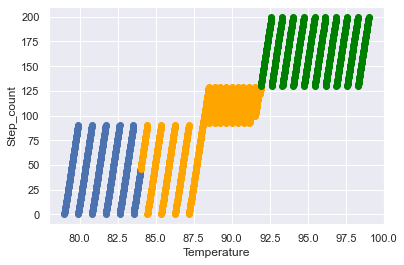

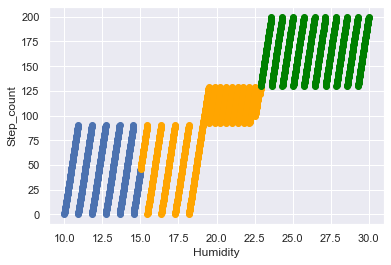

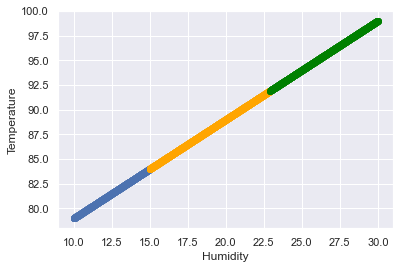

In [3]:
#### part 1

for i in range (2001) :
    if lysis.values[i,3]== 'low':
        plt.scatter(lysis.values[i,1],lysis.values[i,2],  c='b')

for i in range (2001) :
    if lysis.values[i,3]== 'mid':
        plt.scatter(lysis.values[i,1],lysis.values[i,2],  c='orange')

for i in range (2001) :
    if lysis.values[i,3]== 'high':
        plt.scatter(lysis.values[i,1],lysis.values[i,2],  c='green')

plt.xlabel('Temperature')
plt.ylabel('Step_count')
plt.show()

for i in range (2001) :
    if lysis.values[i,3]== 'low':
        plt.scatter(lysis.values[i,0],lysis.values[i,2],  c='b')

for i in range (2001) :
    if lysis.values[i,3]== 'mid':
        plt.scatter(lysis.values[i,0],lysis.values[i,2],  c='orange')

for i in range (2001) :
    if lysis.values[i,3]== 'high':
        plt.scatter(lysis.values[i,0],lysis.values[i,2],  c='green')

plt.xlabel('Humidity')
plt.ylabel('Step_count')
plt.show()

for i in range (2001) :
    if lysis.values[i,3]== 'low':
        plt.scatter(lysis.values[i,0],lysis.values[i,1],  c='b')

for i in range (2001) :
    if lysis.values[i,3]== 'mid':
        plt.scatter(lysis.values[i,0],lysis.values[i,1],  c='orange')

for i in range (2001) :
    if lysis.values[i,3]== 'high':
        plt.scatter(lysis.values[i,0],lysis.values[i,1],  c='green')

plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()



In [4]:
#### part 2
## humanity and temperture are accepted


In [63]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1))
    b = 0.0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float))    
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[0]
    A = sigmoid(np.dot(X, w) + b)
    Y = Y.reshape((-1 , 1))
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    dw = (1 / m) * np.dot(X.T, (A - Y))
    db = (1 / m) * np.sum(A - Y)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {"dw": dw,
             "db": db}
    return grads, cost

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw 
        b = b - learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs


def predict_proba(w , b , X):
    m = X.shape[0]
    Y_prediction = np.zeros((m))
    A = sigmoid(np.dot(X, w) + b)
    return A




def predict(w, b, X):
    A = predict_proba(w , b , X)
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    assert(Y_prediction.shape == (1, X.shape[1]))
    return Y_prediction

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False , proba=False):
    w, b = initialize_with_zeros(X_train.shape[1])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    if not proba:
        Y_prediction_test = predict(w, b, X_test)
        Y_prediction_train = predict(w, b, X_train)
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    else:
        Y_prediction_test = predict_proba(w, b, X_test)
        Y_prediction_train = predict_proba(w, b, X_train)
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

In [64]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [65]:
def getLabelProba(X_train , y_train , X_test ,  label):
    y_train_fit = (y_train == label)
    return model(X_train , y_train_fit , X_test , None , proba=True)["Y_prediction_test"]

In [66]:
def oneAgainstAll(X_train , y_train , X_test , y_test):
    labels = y_train.unique()
    probas = np.empty(shape=(X_test.shape[0] , len(labels)))
    for index , label in enumerate(labels):
        X_train_copy , y_train_copy , X_test_copy = X_train.copy() , y_train.copy() , X_test.copy() 
        probas[: , index] = getLabelProba(X_train_copy.values , y_train_copy.values , X_test_copy.values , label).reshape((-1))
    #return np.argmax(probas , axis=1)
    return probas

In [67]:
trainFeatures = ["Humidity","Temperature"] 
train , test = split_train_test(lysis , 0.2)
X_train , y_train = train[trainFeatures] , train['Stress_Level']
X_test , y_test = test[trainFeatures] , test['Stress_Level']
preds = oneAgainstAll(X_train , y_train , X_test , y_test)

<ipython-input-63-a2f61ea58c51>:16: RuntimeWarning: divide by zero encountered in log
  cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
<ipython-input-63-a2f61ea58c51>:16: RuntimeWarning: invalid value encountered in multiply
  cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
<ipython-input-63-a2f61ea58c51>:2: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(-z))


In [68]:
 y_train.unique()

array(['high', 'mid', 'low'], dtype=object)

In [69]:
preds

array([[2.60e-080, 0.00e+000, 2.80e-274],
       [1.00e+000, 0.00e+000, 0.00e+000],
       [1.19e-060, 0.00e+000, 3.49e-290],
       ...,
       [1.00e+000, 0.00e+000, 0.00e+000],
       [0.00e+000, 0.00e+000, 1.68e-087],
       [0.00e+000, 0.00e+000, 1.00e+000]])

In [70]:
new_preds = []
for i in range(400):
    newlist = [round(n) for n in preds[i]]
    new_preds.append(newlist)

In [75]:
new_preds
for i in range(400):
    newlist = [round(n) for n in preds[i]]
    new_preds.append(newlist)

[[0, 0, 0],
 [1, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 0],
 [1, 0, 0],
 [0, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 0],
 [0, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 0],
 [1, 0, 0],
 [0, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [1, 0, 0],
 [0, 0, 0],
 [0, 0, 1],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 0],
 [1, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0,

In [72]:
y_test

1563     mid
854     high
947      mid
1825     mid
1787     mid
        ... 
1716    high
144     high
587     high
1696     mid
341      low
Name: Stress_Level, Length: 400, dtype: object

In [29]:
######################################################################################################
######   part 3
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X = np.asarray(lysis[['Humidity', 'Temperature', 'Step_count']])
y = np.asarray(lysis['Stress_Level'])
X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

Train set: (1600, 3) (1600,)
Test set: (401, 3) (401,)


In [30]:
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

In [31]:
from sklearn.metrics import jaccard_score

print(jaccard_score(y_test, yhat,average=None))

from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

[0.72 0.88 0.61]


0.592712724967456

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

        high       0.72      1.00      0.84       135
         low       0.88      1.00      0.93        98
         mid       1.00      0.61      0.76       168

    accuracy                           0.84       401
   macro avg       0.87      0.87      0.84       401
weighted avg       0.88      0.84      0.83       401



Confusion matrix, without normalization
[[135   0   0]
 [  0  98   0]
 [ 52  14 102]]


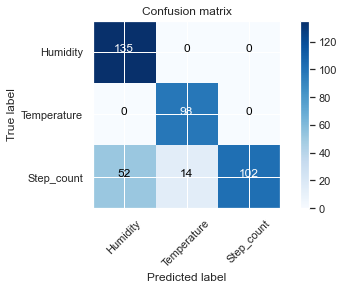

In [33]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    # This function prints and plots the confusion matrix.
    # Normalization can be applied by setting `normalize=True`.

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,
                 i,
                 format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=['Humidity', 'Temperature', 'Step_count'],
                      normalize=False,
                      title='Confusion matrix')

In [34]:
from sklearn.metrics import f1_score

f1_score(y_test, yhat, average=None)


array([0.84, 0.93, 0.76])

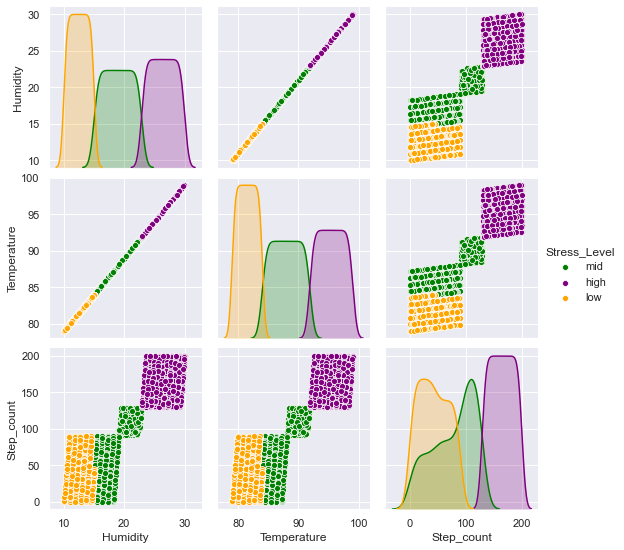

In [28]:

palette = {'low': 'orange', 'mid': 'green', 'high': 'purple'}

g = sns.pairplot(lysis, vars = lysis.columns[0:3], hue="Stress_Level", palette=palette)

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize


def plot_ROC(y_test, y_pred):
    #logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    fig,axs = plt.subplots(1,1,figsize=(6,6))
    axs.spines['right'].set_visible(False)
    axs.spines['top'  ].set_visible(False)
    axs.plot(fpr, tpr, label='Logistic Regression')
    #axs.text(0.2,.6,'Area = %0.2f' % logit_roc_auc,size=15)
    axs.plot([0, 1], [0, 1],'r--')
    axs.set_xlim([0.0, 1.0])
    axs.set_ylim([0.0, 1.05])
    axs.set_xlabel('False Positive Rate(FPR)')
    axs.set_ylabel('True Positive Rate(TPR)')
    axs.set_title('Receiver Operating Characteristic (ROC)')
    axs.legend(loc="lower right")
    plt.show()
 
plot_ROC(y_test, yhat)

ValueError: multiclass format is not supported